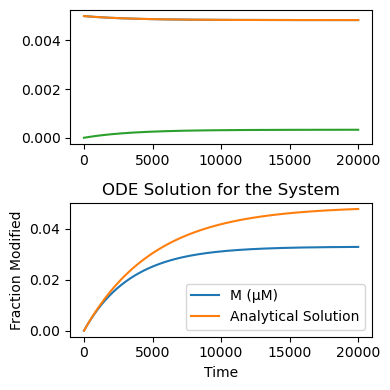

In [29]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt



def odes(t, y):
    U, R, M, S = y
    
    # Define reactions
    dU_dt = -k_open * U + k_close * R
    dR_dt = k_open * U - k_close * R - k_add * R * S
    dM_dt = k_add * R * S
    dS_dt = -k_deg * S - k_add * R * S
    
    return [dU_dt, dR_dt, dM_dt, dS_dt]


# Total concentration constraint
total_concentration = 1e-2  # µM

# Initial conditions
U0 = total_concentration * 0.5  # Start with all in U state
R0 = total_concentration * 0.5  # Start with all in U state
M0 = 0.0
S0 = 1e-3

# Define rate constants
k_open = 1e3  # Define appropriate value
k_close = 1e3  # Define appropriate value
k_deg = 0.0001920122888
k_add = 0.1 * k_deg / S0

# Time span
t_span = (0, 20000)  # Arbitrary long time to observe behavior
t_eval = np.linspace(t_span[0], t_span[1], 1000)  # Time points for evaluation

# Solve ODE
sol = solve_ivp(odes, t_span, [U0, R0, M0, S0], t_eval=t_eval, method='LSODA')

# Define analytical solution
def f_mod(x, k_open, k_close, k_add, k_deg, S):
    K = k_open / k_close
    beta = k_add * S / k_deg
    return 1 - np.exp(- K / (K+1) * beta * (1 - np.exp(- k_deg * x)))

# Plot results
fig, ax = plt.subplots(2, 1, figsize=(4, 4))
ax[0].plot(sol.t, sol.y[0], label='U (µM)')
ax[0].plot(sol.t, sol.y[1], label='R (µM)')
ax[0].plot(sol.t, sol.y[2], label='M (µM)')

# plot fraction modified
ax[1].plot(sol.t, sol.y[2]/total_concentration, label='M (µM)')
ax[1].plot(sol.t, f_mod(sol.t, k_open, k_close, k_add, k_deg, S0), label='Analytical Solution')
ax[1].set_xlabel('Time')
ax[1].set_ylabel('Fraction Modified')
plt.legend()
ax[1].set_title('ODE Solution for the System')
plt.tight_layout()
plt.show()